# Bank Loan Deafaulter Detection

Columns  	Description

id-- A unique LC assigned ID for the loan listing.

member_id--A unique LC assigned Id for the borrower member.

loan_amnt--The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces             the loan amount, then it will be reflected in this value.

funded_amnt--The total amount committed to that loan at that point in time.

funded_amnt_inv--	The total amount committed by investors for that loan at that point in time.

term--The number of payments on the loan. Values are in months and can be either 36 or 60.

int_rate--Interest Rate on the loan

installment--The monthly payment owed by the borrower if the loan originates.

grade--LC assigned loan grade

sub_grade--LC assigned loan subgrade

emp_length--Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

home_ownership--The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

annual_inc-- The self-reported annual income provided by the borrower during registration.

verification_status--	Indicates if income was verified by LC, not verified, or if the income source was verified

issue_d--	The month which the loan was funded

loan_status--	Current status of the loan

dti--	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

delinq_2yrs--	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

earliest_cr_line--	The month the borrower's earliest reported credit line was opened

inq_last_6mths--	The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

mths_since_last_delinq--The number of months since the borrower's last delinquency.

mths_since_last_record--	The number of months since the last public record.

open_acc--	The number of open credit lines in the borrower's credit file.

pub_rec--	Number of derogatory public records

revol_bal--	Total credit revolving balance

revol_util--	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

total_acc--	The total number of credit lines currently in the borrower's credit file

out_prncp--	Remaining outstanding principal for total amount funded

out_prncp_inv--	Remaining outstanding principal for portion of total amount funded by investors

total_pymnt--	Payments received to date for total amount funded

total_pymnt_inv--	Payments received to date for portion of total amount funded by investors

total_rec_prncp--	Principal received to date

total_rec_int--	Interest received to date

total_rec_late_fee--	Late fees received to date

recoveries--	post charge off gross recovery

collection_recovery_fee--	post charge off collection fee

last_pymnt_d--Last month payment was received

last_pymnt_amnt--	Last total payment amount received

next_pymnt_d--	Next scheduled payment date

last_credit_pull_d--	The most recent month LC pulled credit for this loan

pub_rec_bankruptcies--	Number of public record bankruptcies


### Business Problem:- To dect the the Loan Defaulter

Lets start with importing the necessary libraries

In [1]:
import pandas as pd     #data processing
import numpy as np      #Linear Algebra      
import matplotlib.pyplot as plt #Data visualization
%matplotlib inline
import seaborn as sns
colour=sns.color_palette()

In [2]:
df=pd.read_excel('D:\\Datascience\\bank loan risk- aap\\loan.xlsx')

In [3]:
print(df.shape)

(39717, 41)


In [4]:
pd.set_option('display.max_columns',50)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,27.65,0,1985-01-01,1,NaN,NaN,3,0,13648,0.837,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-05-01,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,1.00,0,1999-04-01,5,NaN,NaN,3,0,1687,0.094,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,8.72,0,2001-11-01,2,NaN,NaN,2,0,2956,0.985,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-05-01,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,20.00,0,1996-02-01,1,35.0,NaN,10,0,5598,0.210,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,NaT,2016-04-01,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,17.94,0,1996-01-01,0,38.0,NaN,15,0,27783,0.539,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-06-01,2016-05-01,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null float64
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null datetime64[ns]
loan_status                39717 non-null object
dti                        39717 non-null float64
delinq_2yrs                39717 non-null int64
e

In [6]:
df['loan_status'].unique()      # this is the target variable with three levels

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.0000,516221.0000,665665.000000,8.377550e+05,1.077501e+06
member_id,39717.0,850463.559408,265678.307421,70699.0000,666780.0000,850812.000000,1.047339e+06,1.314167e+06
loan_amnt,39717.0,11219.443815,7456.670694,500.0000,5500.0000,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.0000,5400.0000,9600.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.0000,5000.0000,8975.000000,1.440000e+04,3.500000e+04
int_rate,39717.0,0.120212,0.037248,0.0542,0.0925,0.118600,1.459000e-01,2.459000e-01
installment,39717.0,324.561922,208.874874,15.6900,167.0200,280.220000,4.307800e+02,1.305190e+03
annual_inc,39717.0,68968.926377,63793.765790,4000.0000,40404.0000,59000.000000,8.230000e+04,6.000000e+06
dti,39717.0,13.315130,6.678594,0.0000,8.1700,13.400000,1.860000e+01,2.999000e+01
delinq_2yrs,39717.0,0.146512,0.491812,0.0000,0.0000,0.000000,0.000000e+00,1.100000e+01


from the above description we can see that the anual_income, inq_last_6mths, total_acc, out_prncp, out_prncp_inv, total_rec_late_fee, recoveries, collection_recovery_fee. shows some outlier, we cannot conclude anything now. furthe data understanding and analysis to required to conclude anything

In [8]:
df.isnull().sum()      # Lets check for any null values

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymn

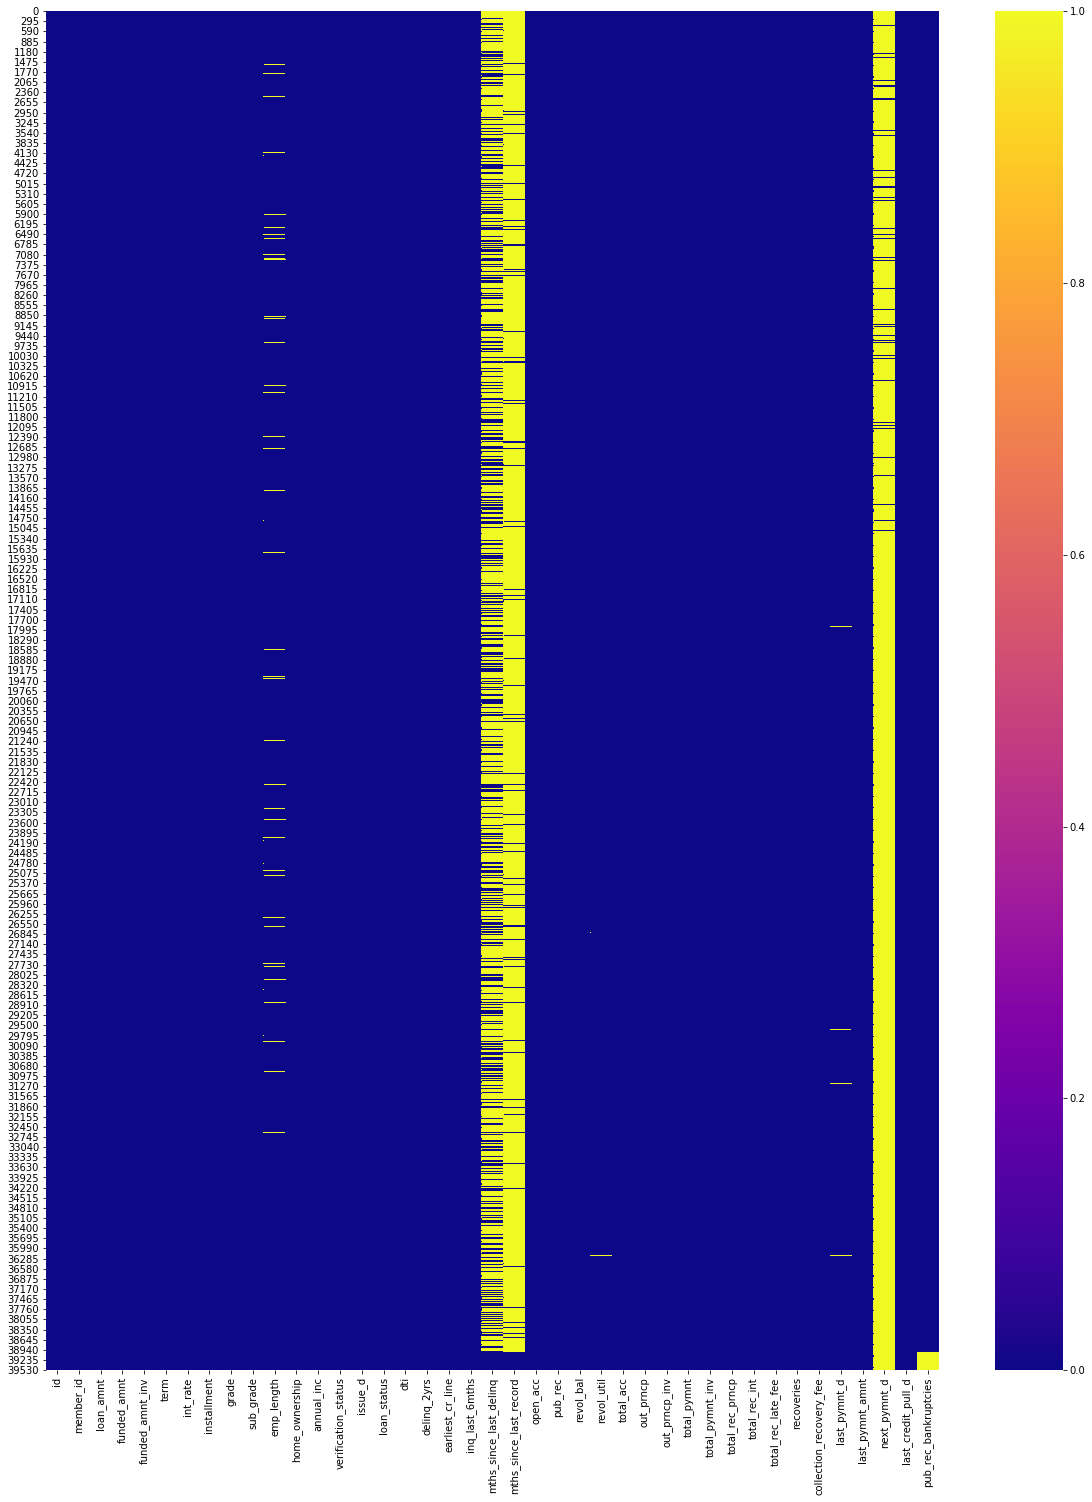

In [9]:
plt.figure(figsize=(20,25))
sns.heatmap(df.isnull(),xticklabels=df.columns, cmap='plasma')
plt.show()

from the above heat map we can visualy see that the varibale like 'mths_since_last_record' and 'next_payment_d' has lots of missing datas. lets analyze the same mathematically

lets calculate the null values in terms of %, and store it in the tabular format

In [10]:
columns=[]
null_values=[]
percentage=[]
for col in df.columns:
    if df[col].isnull().sum()!=0:
        null=df[col].isnull().sum()
        null_values.append(null)
        percent=np.round((null/df[col].isnull().count())*100,2)
        percentage.append(percent)
        columns.append(col)    

In [11]:
summary=pd.DataFrame({'columns':columns, 'null_values':null_values, '%': percentage})

In [12]:
summary.sort_values(by='%', ascending=False)

,columns,null_values,%
5,next_pymnt_d,38577,97.13
2,mths_since_last_record,36931,92.99
1,mths_since_last_delinq,25682,64.66
0,emp_length,1075,2.71
7,pub_rec_bankruptcies,697,1.75
4,last_pymnt_d,71,0.18
3,revol_util,50,0.13
6,last_credit_pull_d,2,0.01


from the above table we can see that variables 'mths_since_last_delinq', 'mths_since_last_record' and 'next_pymnt_d' have 64.66%. 93% and 97% of missing data respectively. we drop these variable

In [13]:
df=df.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'], axis=1)


In [14]:
df.shape

(39717, 38)

lets fill in the missing values for the remaning variable

In [15]:
for col in df.select_dtypes(('int64', 'float64')):
    if df[col].isnull().sum()!=0:
        df[col]=df[col].fillna(df[col].mean())


In [16]:
for col in df.select_dtypes('object'):
    if df[col].isnull().sum()!=0:
        df[col]=df[col].fillna(df[col].value_counts().index[0])


OUT- Lier Analysis

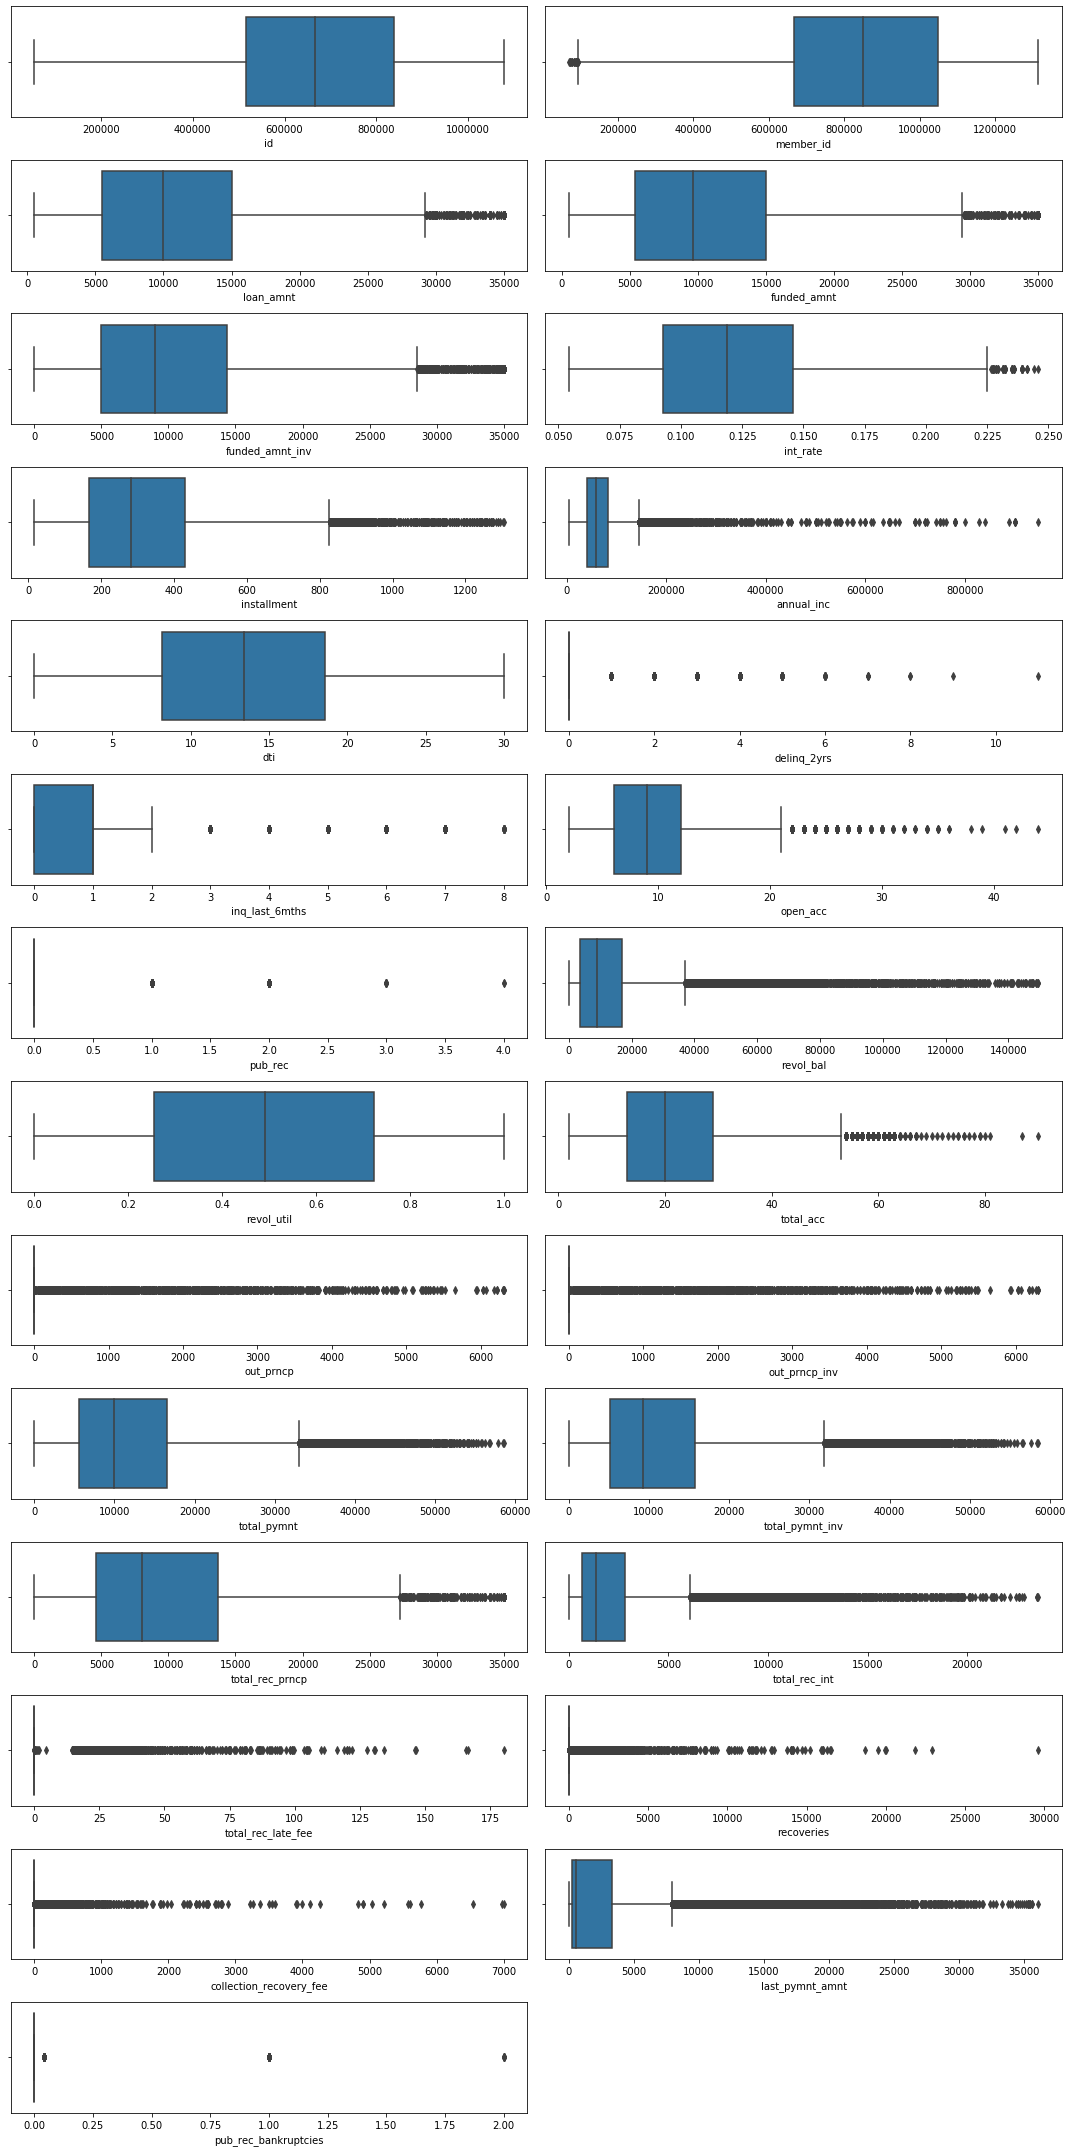

In [37]:
plt.figure(figsize=(15,30))
num_col=[]
n=1
for col in df.select_dtypes(('int64', 'float64')):
    plt.subplot(14,2,n)
    sns.boxplot(df[col])
    plt.tight_layout()
    n=n+1
plt.show()

In [35]:
(df['annual_inc'].values>1000000).sum() # the third quantile is 83k, so lets take 10 lac as the max value and drop the grater values

0

In [31]:
df=df[df['annual_inc']<1000000]

In [44]:
df.shape

(39703, 38)

In [43]:
(df['open_acc'].values>30).sum()

30

all other numerical varibles that shows outliers. we cannot actually treat all of them as out liers, as we have the risk of loosing importabt information for further analysis. We will first start working with the present dataset. a revisit the outliers if we come accross any model accuracy

there are two types of grading system. one grade and the other is sub-grade, sub grade is nothing but a further categorization of the Grade. lets see how many levels does these two variable have and based on that we might wanna drop one pf the variable 

In [45]:
df['grade'].nunique()

7

In [46]:
df['sub_grade'].nunique()

35

Since Sub grade had too many levels. its better we choose grade variable ove sub_grade because the grade varibale gives enough explaination with limited level

In [47]:
df=df.drop('sub_grade', axis=1)

lets use foward fill method to handle missing value in 'last_payment_d' variable

In [48]:
 df['last_pymnt_d']=df['last_pymnt_d'].ffill()

Lets change the change the dtype of all the object columns into category 

In [50]:
for col in df.select_dtypes('object'):
    df[col]=df[col].astype('category')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39703 entries, 0 to 39716
Data columns (total 37 columns):
id                         39703 non-null int64
member_id                  39703 non-null int64
loan_amnt                  39703 non-null int64
funded_amnt                39703 non-null int64
funded_amnt_inv            39703 non-null float64
term                       39703 non-null category
int_rate                   39703 non-null float64
installment                39703 non-null float64
grade                      39703 non-null category
emp_length                 39703 non-null category
home_ownership             39703 non-null category
annual_inc                 39703 non-null float64
verification_status        39703 non-null category
issue_d                    39703 non-null datetime64[ns]
loan_status                39703 non-null category
dti                        39703 non-null float64
delinq_2yrs                39703 non-null int64
earliest_cr_line           39703 non-n

### Explaintory Data Analysis

Univariate Analysis- Target variable

In [52]:
df['loan_status'].value_counts()

Fully Paid     32937
Charged Off     5626
Current         1140
Name: loan_status, dtype: int64

In [53]:
size=[df.loan_status[df['loan_status']=='Fully Paid'].count(),df.loan_status[df['loan_status']=='Charged Off'].count(),df.loan_status[df['loan_status']=='Current'].count()]
size

[32937, 5626, 1140]

In [54]:
labels=['Fully paid', 'Charged off', 'Current']

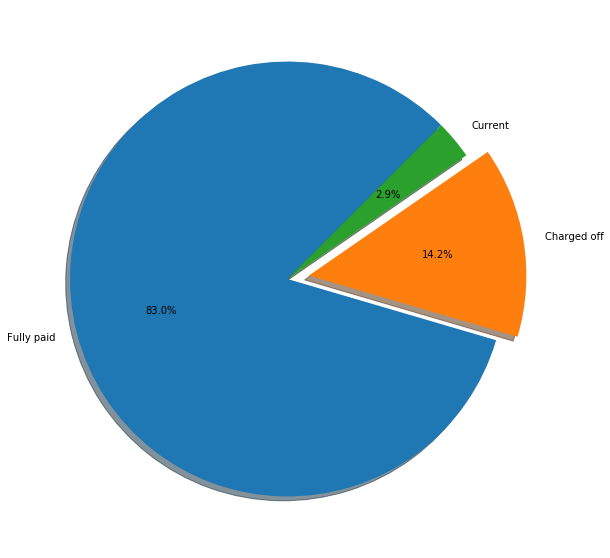

In [55]:
plt.figure(figsize=(10,10))
plt.pie(size, labels=labels, explode=(0,0.1,0), shadow=True, autopct='%1.1f%%', startangle=45)
plt.show()

Univariate Analysis- Num columns

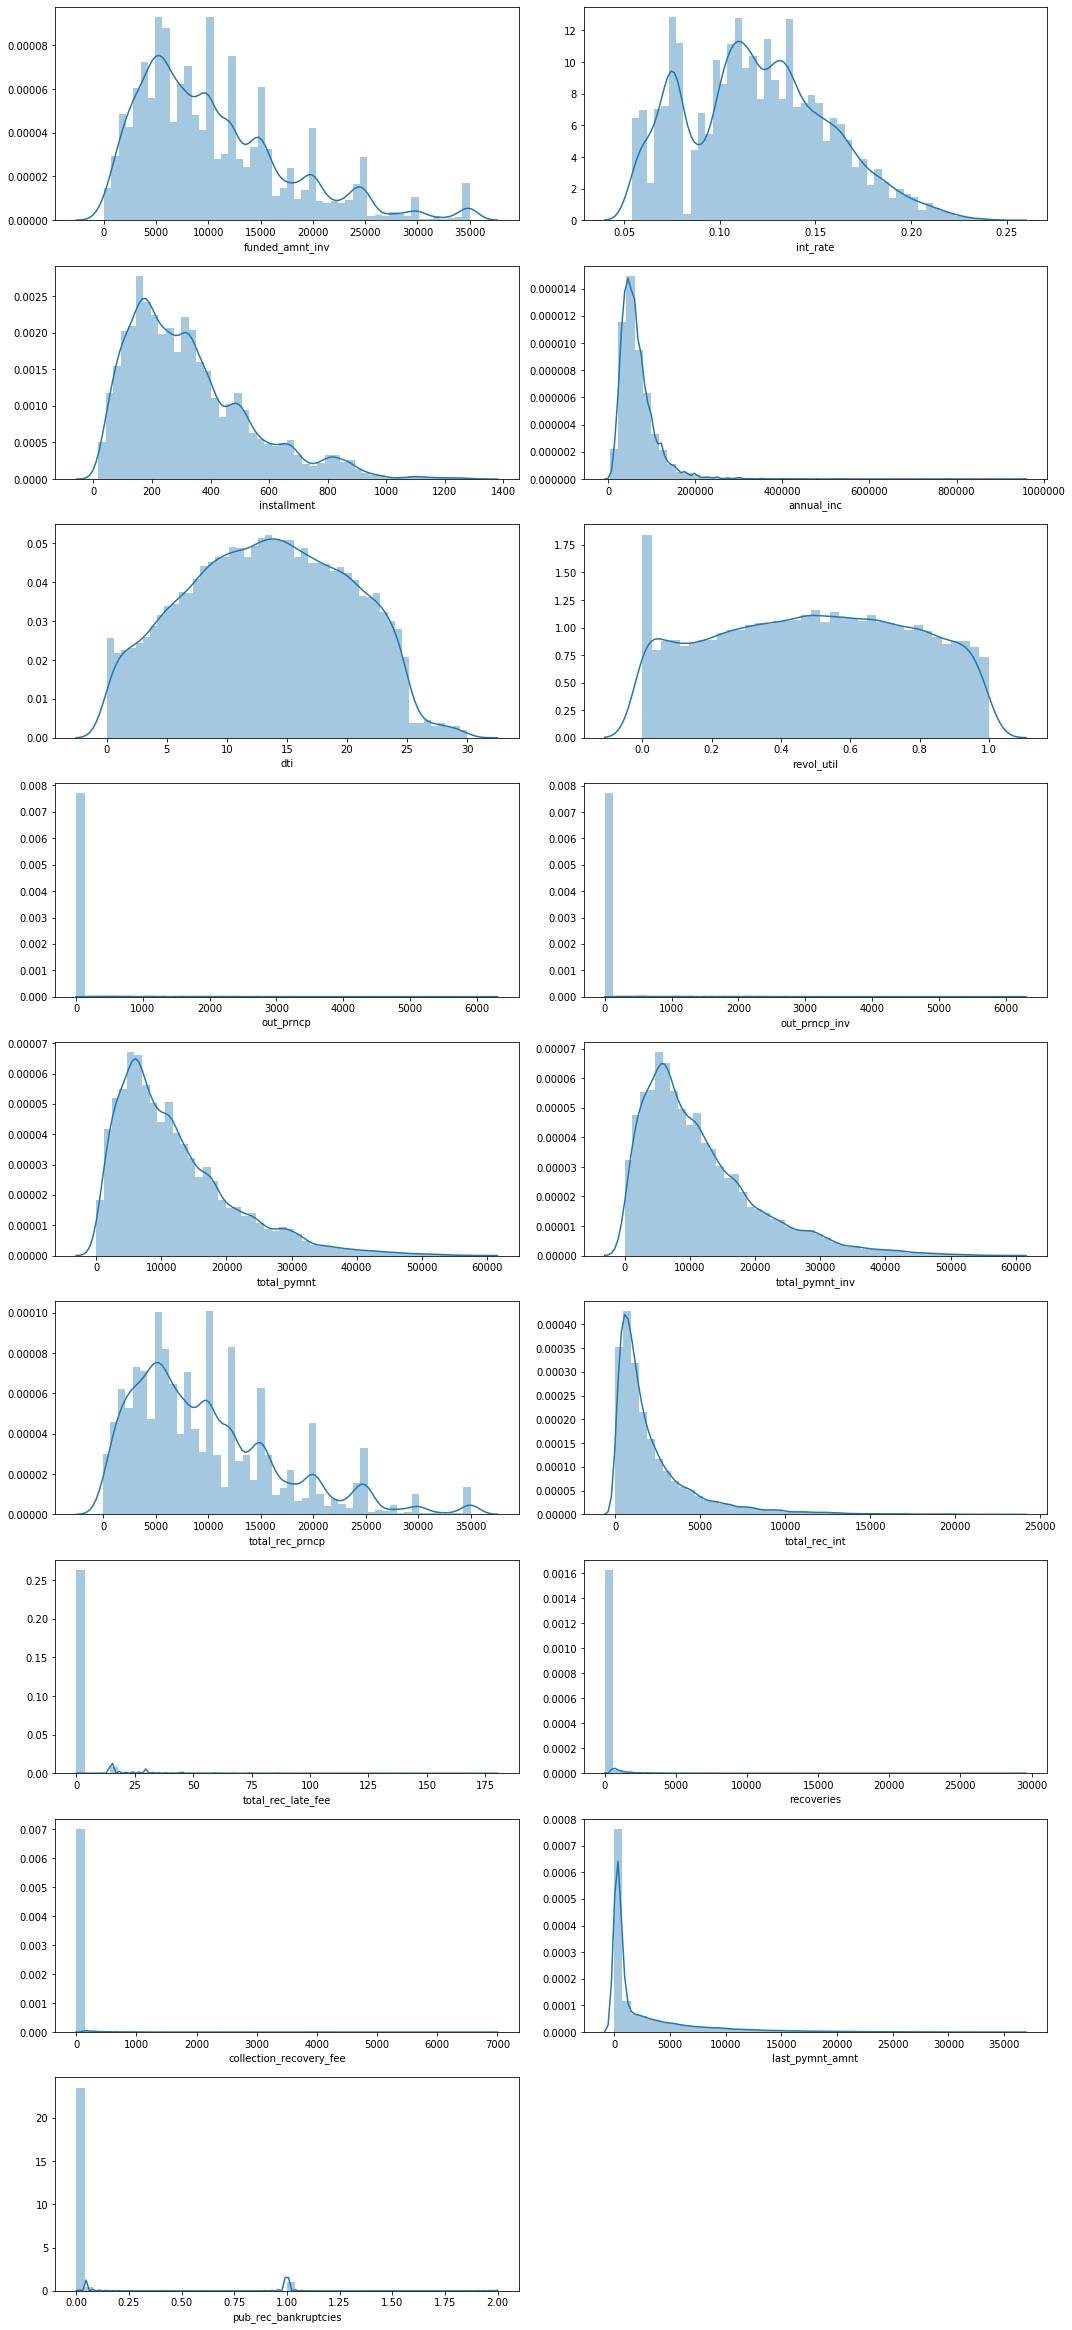

In [56]:
num_cols=[]
plt.figure(figsize=(15,50))
n=1
for col in df.select_dtypes('float64', 'int64'):
    plt.subplot(14,2,n)
    sns.distplot(df[col])
    plt.tight_layout()
    n=n+1
    num_cols.append(col)
plt.show()
    

We can see that almost all the columns are positively skewed!

Univariate Analysis: Categorical columns

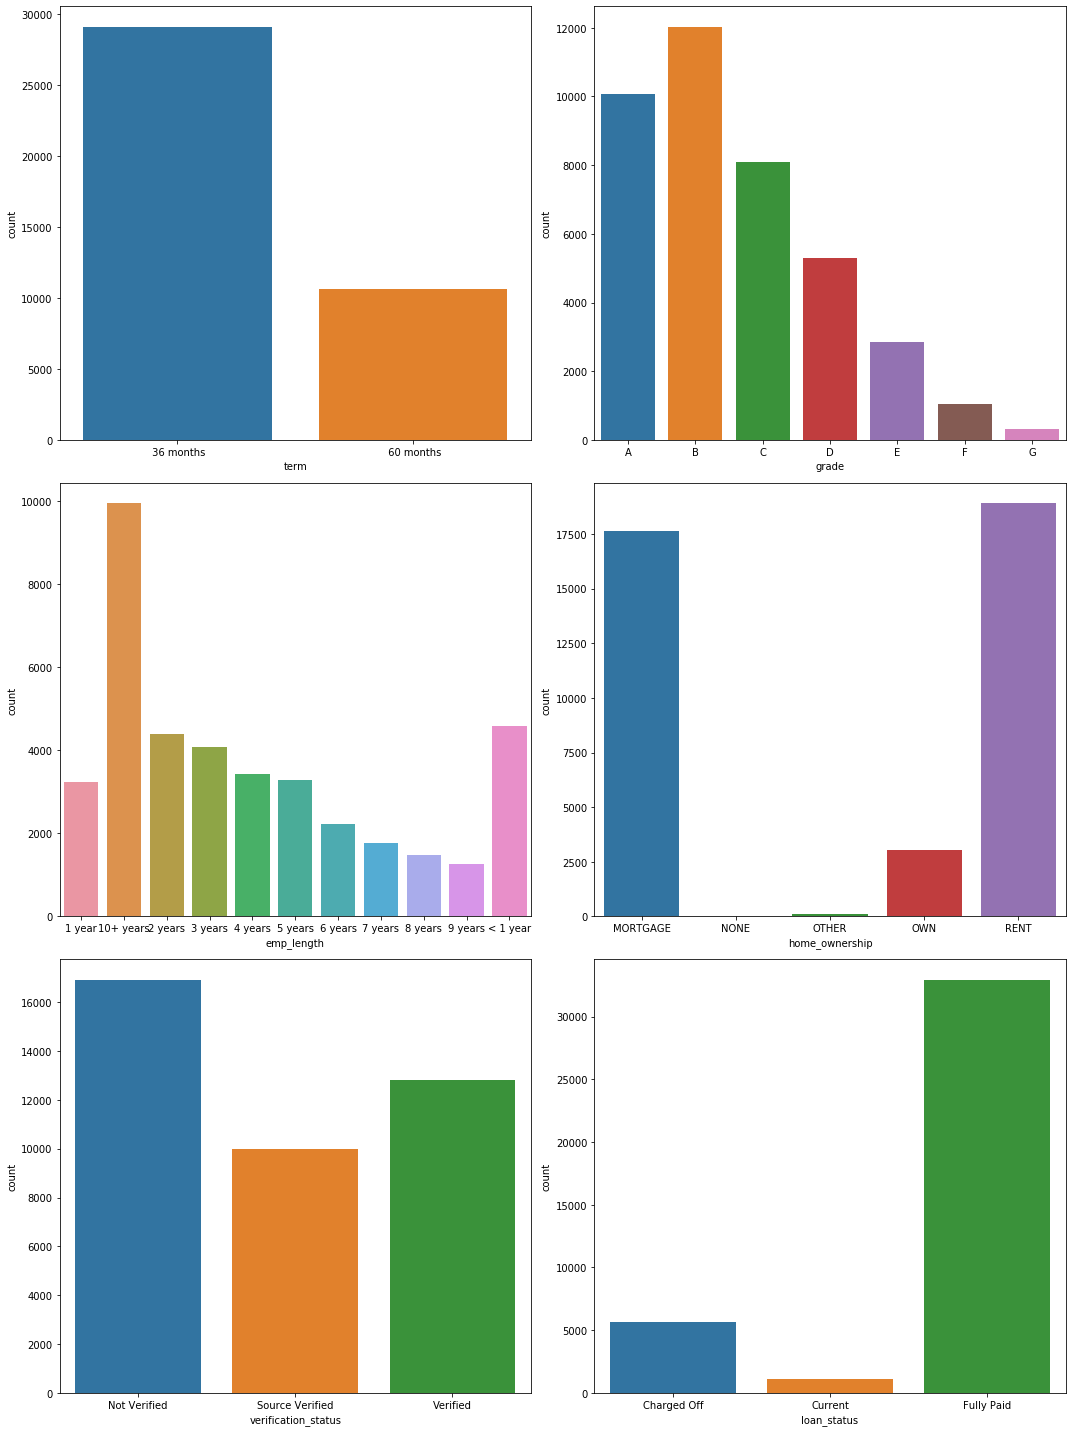

In [57]:
cat_cols=[]
plt.figure(figsize=(15,20))
n=1
for col in df.select_dtypes('category'):
    plt.subplot(3,2,n)
    sns.countplot(x=col, data=df)
    plt.tight_layout()
    n=n+1
    cat_cols.append(col)
plt.show()

from the above graph we can see that maximum no. of people have used the 36 month term.
people who are employed for more than 10 years are more likely to apply for loan.
We also see a maximum no. of people belong to the A, B and C grades

#### Bi-variate Analysis

now we see that 83% fully paid and 2.9% are currently paying thier loan. and 14.2% have charges off with out paying back the bank. 

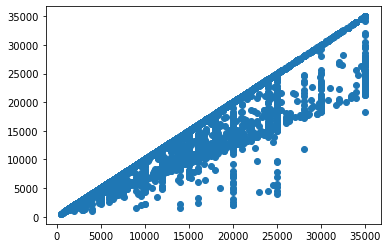

In [58]:
plt.scatter(df['loan_amnt'], df['funded_amnt'])

We see mostly the loan_amount and the funded amount follows a linear relation ship.

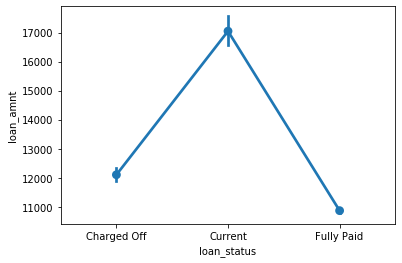

In [59]:
sns.pointplot(y='loan_amnt',x='loan_status', data=df)
plt.show()

We can clearly see that the loan amount fully paid is lower as compare to Charged off and current

In [60]:
term_status=pd.crosstab(df['loan_status'], df['term'], margins=True)     # getting the relation ship between loan status and term
print(term_status)

term          36 months   60 months    All
loan_status                               
Charged Off        3227        2399   5626
Current               0        1140   1140
Fully Paid        25860        7077  32937
All               29087       10616  39703


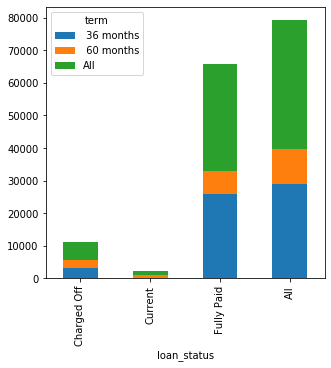

In [61]:
term_status.plot(kind='bar', stacked=True, figsize=(5,5), legend=True)
plt.show()

we notice that people with 60 months term are the only people who are currently paying, otherwise 30 moths are either fully paid or charged off!
after seeing this grap, it would be better id we can visualise this in terms of the loan amount too.

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


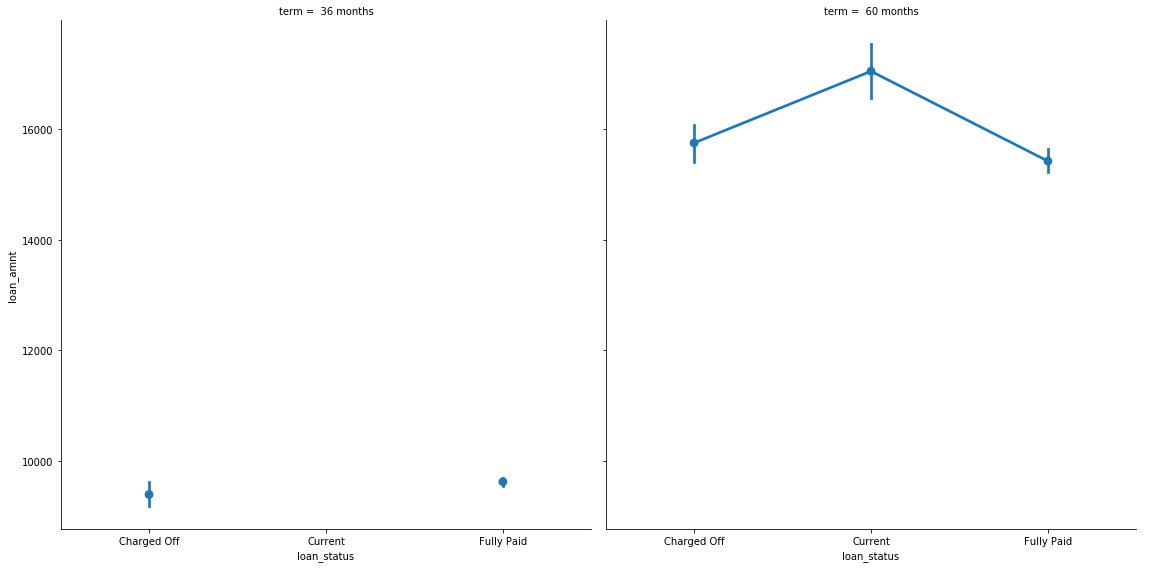

In [62]:
facet_grid=sns.FacetGrid(df, col='term', size=8)
facet_grid.map(sns.pointplot, 'loan_status', 'loan_amnt', palette=None, order=None, hue_order=None)
facet_grid.add_legend()

from the above grap we can clearly see that the higher loan amount  60 months term, and for lower loan amount we get, 36 months term

In [63]:
grade_status=pd.crosstab(df['grade'], df['loan_status'])
grade_status

loan_status,Charged Off,Current,Fully Paid
grade,,,
A,602,40,9436
B,1425,345,10249
C,1346,264,6483
D,1118,222,3966
E,715,179,1948
F,319,73,657
G,101,17,198


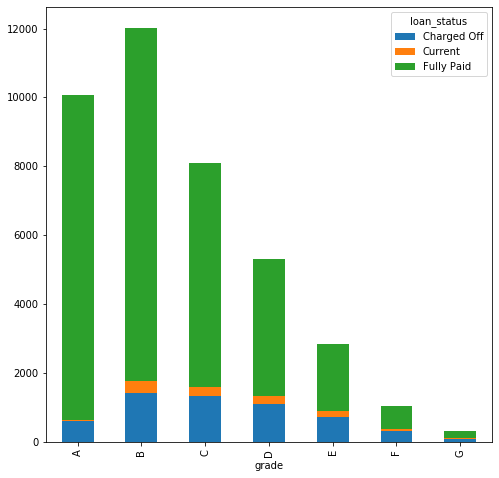

In [64]:
grade_status.plot(kind='bar', stacked=True, figsize=(8,8), legend=True)
plt.show()

from the above graph we can see that customer with grade B anf C are more likely to default, as compare to all other grade.

In [65]:
emp_status=pd.crosstab(df['emp_length'], df['loan_status'])
emp_status

loan_status,Charged Off,Current,Fully Paid
emp_length,,,
1 year,456,71,2711
10+ years,1559,433,7957
2 years,566,97,3724
3 years,555,83,3456
4 years,462,94,2880
5 years,458,88,2735
6 years,307,61,1861
7 years,263,62,1447
8 years,203,44,1231


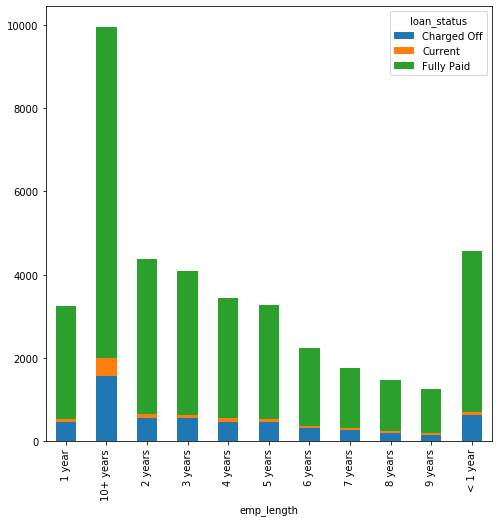

In [66]:
emp_status.plot(kind='bar', stacked=True, figsize=(8,8), legend=True)
plt.show()

people with 10+ years of emp_length are the maximum likely to take a loan.

In [67]:
own_status=pd.crosstab(df['home_ownership'], df['loan_status'])
own_status

loan_status,Charged Off,Current,Fully Paid
home_ownership,,,
MORTGAGE,2326,638,14685
NONE,0,0,3
OTHER,18,0,80
OWN,443,83,2531
RENT,2839,419,15638


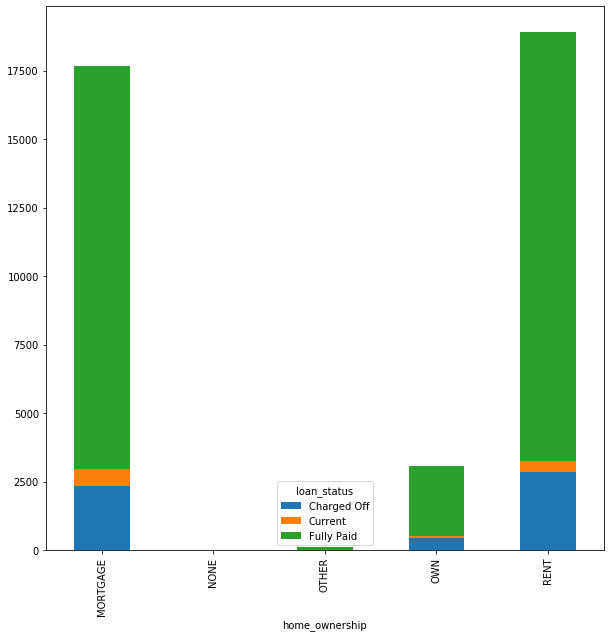

In [68]:
own_status.plot(kind='bar', stacked=True, figsize=(10,10), legend=True)
plt.show()

people in the rented pkace have charged of more than Mortgage and Own, we also notice its very safe to lend a loan to people who own a house. 

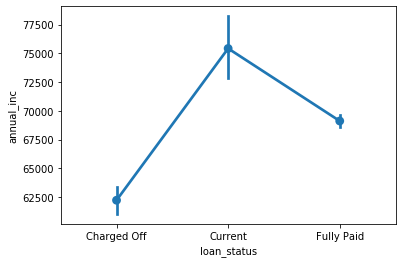

In [69]:
sns.pointplot(x='loan_status', y='annual_inc', data=df)
plt.show()

its very Evident form the above graph the people with lower annual income has a higher chances for defaulting the payment

In [70]:
veri_status=pd.crosstab(df['verification_status'], df['loan_status'])
veri_status

loan_status,Charged Off,Current,Fully Paid
verification_status,,,
Not Verified,2142,227,14545
Source Verified,1434,310,8238
Verified,2050,603,10154


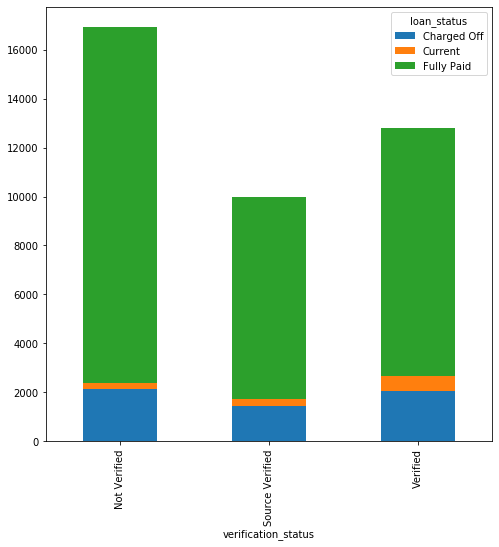

In [72]:
veri_status.plot(kind='bar', stacked=True, legend=True, figsize=(8,8))
plt.show()

we notcie that all three categories have somewhat equal propotion of customers being charged off!

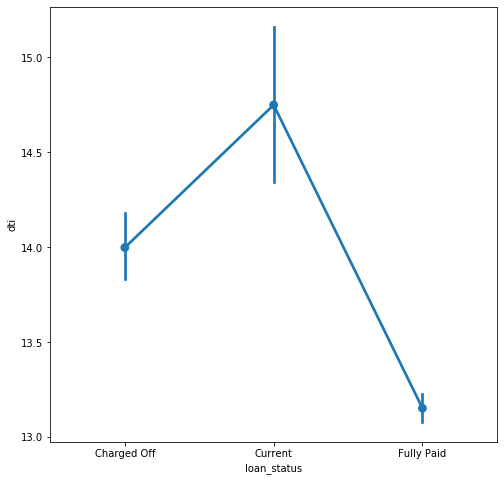

In [73]:
plt.figure(figsize=(8,8))
sns.pointplot(x='loan_status', y='dti', data=df, legend=True)
plt.show()

We notice that dti value between 13.5 to 14.5 have charged off, higher that 14.5 are currently paying and lower dti have completely paid


Lets check for correlation between target and features of our data set. This will help us know the feature that play a significant role for the target variable.

In [76]:
from yellowbrick.target import FeatureCorrelation

In [77]:
target=df['loan_status']

In [78]:
feature=df.drop('loan_status', axis=1)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

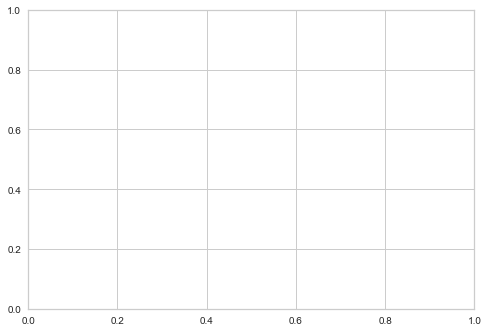

In [80]:
#visualizer=FeatureCorrelation(labels=feature.columns)
#visualizer.fit(feature,target)
#visualizer.show()

In [83]:
from scipy.stats import chisquare, chi2_contingency

In [84]:
p_value=[] 
for col in feature.columns:
    cont=pd.crosstab(df[col], df['loan_status'])
    chi2_stat, p_val, dof, tabel= chi2_contingency(cont)
    p_value.append(p_val)

In [89]:
feat_tar_relation=pd.DataFrame({'columns': feature.columns, 'P-Values': p_value})
feat_tar_relation.sort_values(by=['P-Values'], ascending=True)

,columns,P-Values
8,grade,0.000000e+00
24,out_prncp_inv,0.000000e+00
27,total_rec_prncp,0.000000e+00
13,issue_d,0.000000e+00
29,total_rec_late_fee,0.000000e+00
30,recoveries,0.000000e+00
23,out_prncp,0.000000e+00
34,last_credit_pull_d,0.000000e+00
6,int_rate,0.000000e+00
5,term,0.000000e+00
